In [57]:
# Setup directories for Google Colab
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')
%cd MLexercise_CarDimensions

import glob
import re
import pandas as pd

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

file_paths = glob.glob("results/weight_prediction*.csv")
# file_paths.sort(key=lambda x: int(re.search(r'\d+', x).group()))
file_paths = file_paths[::-1]
print(file_paths)

dataframes = [pd.read_csv(path, encoding='ISO-8859-1') for path in file_paths]


/content/drive/MyDrive/Colab Notebooks/MLexercise_CarDimensions
['results/weight_prediction_TF.csv', 'results/weight_prediction_PyTorch.csv', 'results/weight_prediction_sklearn.csv']


In [58]:
dataframes[1]
# dataframes[0]['Actual']

,Actual,Predicted,Error,Error %
0,1114.0,1095.809123,-18.190877,1.632933
1,2255.0,2278.135183,23.135183,1.025950
2,2255.0,2297.656080,42.656080,1.891622
3,2327.0,2278.135183,-48.864817,2.099906
4,2327.0,2297.656080,-29.343920,1.261019
...,...,...,...,...
3759,1610.0,1542.075672,-67.924328,4.218902
3760,1585.0,1542.075672,-42.924328,2.708159
3761,1590.0,1542.075672,-47.924328,3.014109
3762,2064.0,2055.009471,-8.990529,0.435588


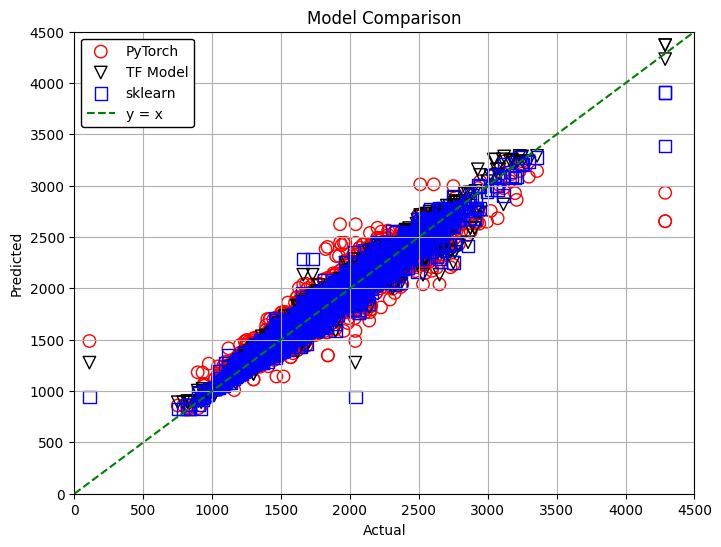

In [59]:
from notebooks.utils import plot_scatter_comparison

# # swap components to plot on the top
# dataframes[0], dataframes[2] = dataframes[2], dataframes[0]

plot_scatter_comparison(
    dfs=dataframes,
    labels=["PyTorch", "TF Model", "sklearn"],
    x_col="Actual", y_col="Predicted",
    xlabel="Actual",
    ylabel="Predicted",
    title="Model Comparison",
    xrange=[0, 4500],
    yrange=[0, 4500],
    # xrange=None,
    # yrange=None,
    drawline=True
)

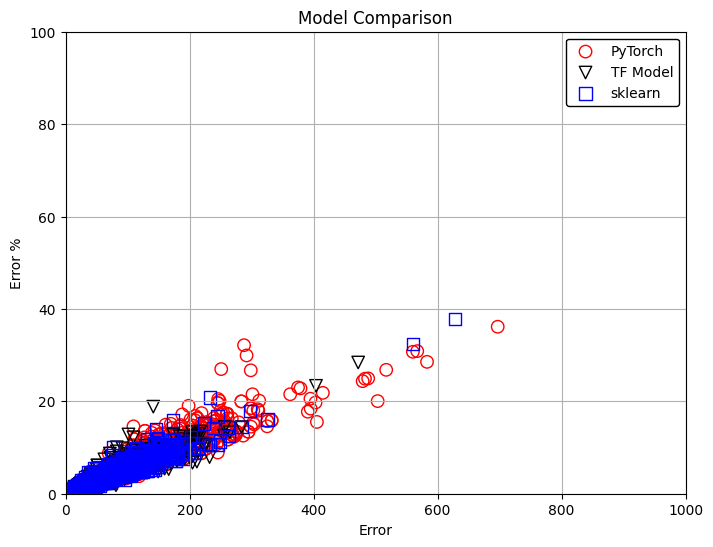

In [60]:
plot_scatter_comparison(
    dfs=dataframes,
    labels=["PyTorch", "TF Model", "sklearn"],
    x_col="Error", y_col="Error %",
    xlabel="Error",
    ylabel="Error %",
    title="Model Comparison",
    xrange=[0, 1000],
    yrange=[0, 100]
)

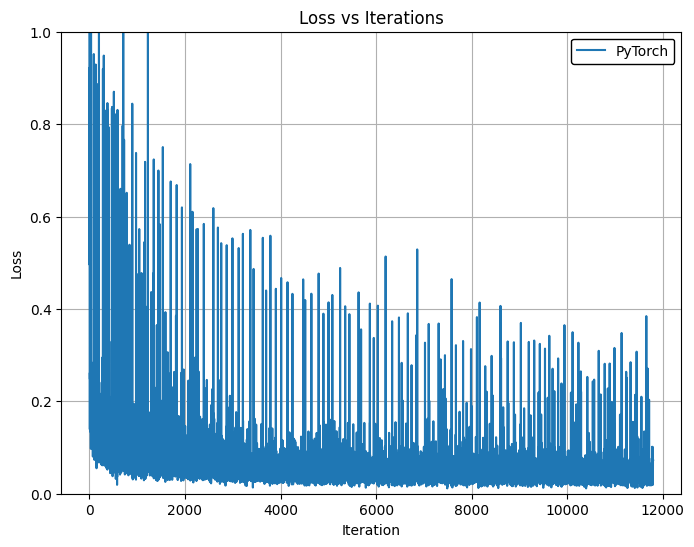

In [72]:
logPT = pd.read_csv("results/learning_log_PyTorch.csv")
logTF = pd.read_csv("results/learning_log_TF.csv")

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(logPT['loss_history'], label='PyTorch')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.ylim(0, 1)
plt.legend(facecolor='white', edgecolor='black', framealpha=1.0)
plt.grid(True, zorder=0)

# plt.figure(figsize=(8, 6))
# plt.plot(logTF['loss_history'], 'r', label='Tensorflow')
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.title("Loss vs Epochs")
# plt.ylim(0.0325, .04)
# plt.legend(facecolor='white', edgecolor='black', framealpha=1.0)
# plt.grid(True, zorder=0)